In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_validate,ShuffleSplit
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,confusion_matrix,classification_report
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
url="https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/heart.csv"
df=pd.read_csv(url)


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:ylabel='Frequency'>

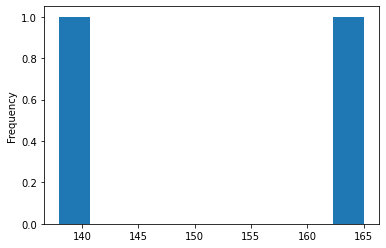

In [5]:
df["target"].value_counts().plot(kind="hist")

In [6]:
x=df.drop(columns=["target"])
y=df.target

xsam1,ysam1=SMOTE().fit_resample(x,y)
xsam1.shape,ysam1.shape

((330, 13), (330,))

In [7]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler
xsam2,ysam2=NearMiss().fit_resample(x,y)
xsam2.shape,ysam2.shape

((276, 13), (276,))

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(xsam1,ysam1,test_size=.2,random_state=0)
model=KNeighborsClassifier()
model.fit(xtrain,ytrain)
ypre=model.predict(xtest)
cm=confusion_matrix(ytest,ypre)
cr=classification_report(ytest,ypre)

In [9]:
print(cm)
print(cr)

[[19 11]
 [14 22]]
              precision    recall  f1-score   support

           0       0.58      0.63      0.60        30
           1       0.67      0.61      0.64        36

    accuracy                           0.62        66
   macro avg       0.62      0.62      0.62        66
weighted avg       0.63      0.62      0.62        66



In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(xsam2,ysam2,test_size=.2,random_state=0)
model=KNeighborsClassifier()
model.fit(xtrain,ytrain)
ypre=model.predict(xtest)
cm=confusion_matrix(ytest,ypre)
cr=classification_report(ytest,ypre)
print(cm)
print(cr)

[[15 11]
 [ 7 23]]
              precision    recall  f1-score   support

           0       0.68      0.58      0.62        26
           1       0.68      0.77      0.72        30

    accuracy                           0.68        56
   macro avg       0.68      0.67      0.67        56
weighted avg       0.68      0.68      0.68        56



In [11]:
model=make_pipeline(StandardScaler(),LogisticRegressionCV())
model.fit(xtrain,ytrain)
ypre=model.predict(xtest)
cm=confusion_matrix(ytest,ypre)
cr=classification_report(ytest,ypre)
print(cm)
print(cr)


[[17  9]
 [ 2 28]]
              precision    recall  f1-score   support

           0       0.89      0.65      0.76        26
           1       0.76      0.93      0.84        30

    accuracy                           0.80        56
   macro avg       0.83      0.79      0.80        56
weighted avg       0.82      0.80      0.80        56



In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(xsam2,ysam2,test_size=.2,random_state=0)
model=KNeighborsClassifier()
model.fit(xtrain,ytrain)
ypre=model.predict(xtest)
cm=confusion_matrix(ytest,ypre)
cr=classification_report(ytest,ypre)
print(cm)
print(cr)


[[15 11]
 [ 7 23]]
              precision    recall  f1-score   support

           0       0.68      0.58      0.62        26
           1       0.68      0.77      0.72        30

    accuracy                           0.68        56
   macro avg       0.68      0.67      0.67        56
weighted avg       0.68      0.68      0.68        56



((100, 1), (100,))

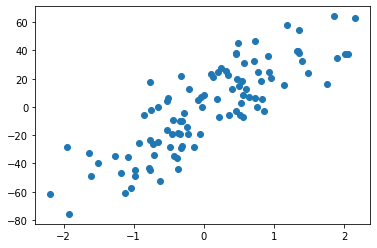

In [21]:
                 
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

X.shape,y.shape    

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape
from sklearn.linear_model import LinearRegression
'''lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)'''
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self,X,y):# calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            print(loss_slope_b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            print(loss_slope_m)
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)       
    def predict(self,X):
        return self.m * X + self.b
    
gd = GDRegressor(0.001,50)
gd.fit(X_train,y_train)

-18254.207774488757
9953.701077881147
-15414.19417304841
8591.034328486188
-13017.540401683793
7412.154037504528
-10994.798197931963
6392.761240244747
-9287.434115088945
5511.6818485103995
-7846.108474070281
4750.480862424274
-6629.226556746172
4093.121183592239
-5601.718843541419
3525.6624669409894
-4734.01397267054
3035.9957909534514
-4001.1738758001384
2613.6102721616335
-3382.165400769939
2249.3880901797547
-2859.2468136673915
1935.4247176696997
-2417.4510038070107
1664.8714610212373
-2044.1500999441835
1431.7977094679998
-1728.688631632885
1231.0705613703797
-1462.0744093198534
1058.2497459334095
-1236.718012123672
909.4959868230103
-1046.2132149953732
781.4911616084084
-885.1519005467785
671.3687986290563
-748.9680217688851
576.6536219080872
-633.8060408185736
495.2090063798412
-536.4099918037982
425.19134129109943
-454.02992370776906
365.01042050686954
-384.3429914687983
313.2950859078268
-325.3868940792462
268.8634453629856
-275.50372125049665
230.69707108670082
-233.2925755283